In [4]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

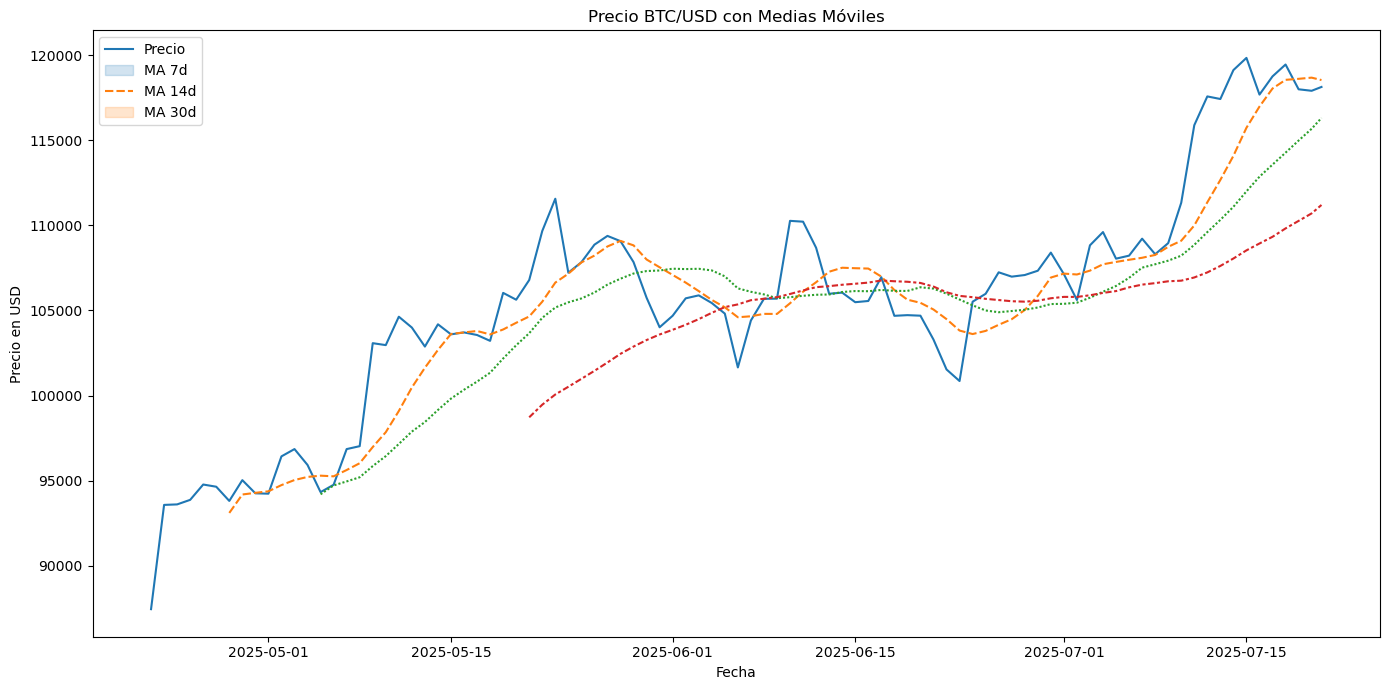

In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_btc_data(vs_currency='usd', days=90):
    url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart'
    params = {
        'vs_currency': vs_currency,
        'days': days,
        'interval': 'daily'
    }
    response = requests.get(url, params=params)
    response.raise_for_status()
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', f'price_{vs_currency}'])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('date', inplace=True)
    df = df[[f'price_{vs_currency}']]
    return df

def plot_moving_averages(vs_currency='usd', days=90):
    df = get_btc_data(vs_currency, days)
    df['MA_7d'] = df.iloc[:, 0].rolling(window=7).mean()
    df['MA_14d'] = df.iloc[:, 0].rolling(window=14).mean()
    df['MA_30d'] = df.iloc[:, 0].rolling(window=30).mean()

    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df)
    plt.title('Precio BTC/USD con Medias Móviles')
    plt.xlabel('Fecha')
    plt.ylabel('Precio en USD')
    plt.legend(['Precio', 'MA 7d', 'MA 14d', 'MA 30d'])
    plt.tight_layout()
    plt.show()

plot_moving_averages()



In [ ]:
plot_moving_averages()